<a href="https://colab.research.google.com/github/bernebas/Bernebas/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ORIE 4580/5580/5581 Assignment 3

#### Students: S. Ulam (su001) and J. von Neuman (jvn001)

### Github link: [example Github link](https://github.com/SidBanerjee/ORIE4580-Simulation/blob/main/Notebooks/Unit0-Intro_Demos.ipynb)

(**Please replace this with your own link!**)

### Instructions


* Due Thursday September 25, at 11.59pm on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/80773#:~:text=Assignments-,Assignments,-Assignments%20module%20publish).
* Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Gemini/Claude/ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**.
* You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.




### Suggested reading

Chapters 7 (you can skim through this), and chapters 8 and 9 of [Introduction to Probability](https://chance.dartmouth.edu/teaching_aids/books_articles/probability_book/book.html) by Grinstead and Snell.

Chapter 3 and chapter 4 (up to section 4.5) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).

In [ ]:
#importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline

<hr><hr>

## Question 1: Combining LCGs (20 points)

In order to avoid biases, simulations should not use anywhere near the full period of an LCG (otherwise, the random sequence repeats\ldots). For example, a typical traffic simulator may have $10,000$ vehicles, each experiencing thousands of random disturbances, thus needing around $10^7$ random samples per replication -- for this, an LCG using $m=2^{31}-1\approx 2\times 10^9$ is insufficient, as after $100$ replications the sequences get correlated.

One method to combine multiple LCGs to obtain a generator with a longer period is to add a smaller period LCG to it. For example, suppose we have two generators $X_{n+1}  =  (a_1 X_n) \mbox{ mod } m_1$ and $Y_{n+1}  =  (a_2 Y_n) \mbox{ mod } m_2$, with $m_1>m_2$. We can derive a combined generator by setting $Z_n  =  (X_n + Y_n) \mbox{ mod } m_1$. If properly designed, the resulting period can be on the order of $m_1m_2$. We will now study a small example to see how this works.


<hr>

**(a)** Consider two LCGs, $x_{n+1} = (5 x_n) \mod 16$ and $y_{n+1} = (2 y_n) \mod 7$. Starting both with seed $x_0 = y_0 = 1$, plot the sequences $x_n, y_n$ using the clock visualization introduced in class (separate plot for each sequence; you can use and modify the code in Demo-PRNGs.ipynb on Canvas).

<hr>

In [ ]:
# Functions to visualize LCG sequence on clock (see demo notebook)


In [ ]:
# Function to generate pseudorandom sequence using LCG
# Set default parameters to glibc specifications (see demo notebook)


x-sequence (mod 16) including closure: [1, 5, 9, 13, 1]
Length including closure: 5
y-sequence (mod 7) including closure: [1, 2, 4, 1]
Length including closure: 4


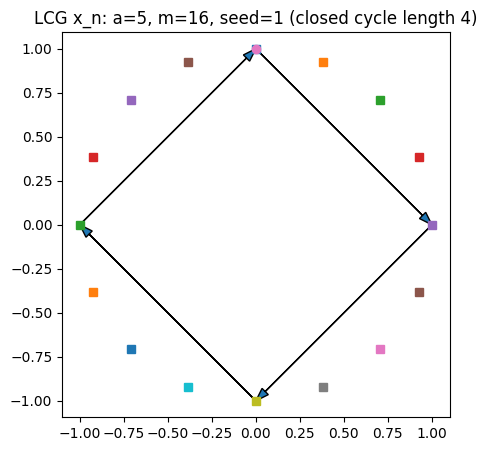

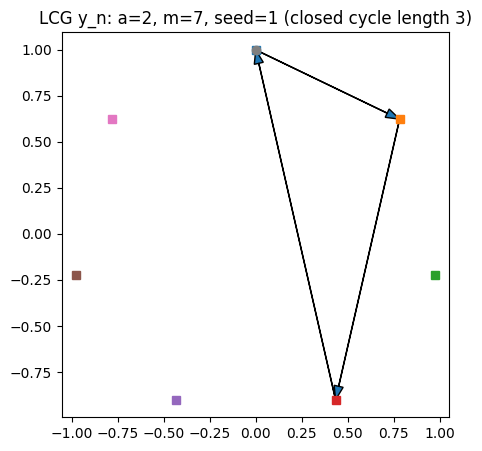

In [ ]:
# Ans

# Imports
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------
# Functions to visualize LCG sequence on a "clock"
# (adapted from your demo; kept simple and readable)
# ------------------------------
def plot_clock_face(m, fig, annotate=False):
    """
    Plot m equally spaced points on the unit circle.
    """
    for i in range(m):
        theta = 2.0 * np.pi * i / m
        plt.plot(np.sin(theta), np.cos(theta), marker='s')  # default color
        if annotate:
            plt.annotate(str(i), (np.sin(theta), np.cos(theta)))

def plot_clock_path(m, x, fig):
    """
    Draw arrows following the LCG sequence x on the unit circle.
    """
    # Plot the seed
    theta_0 = 2.0 * np.pi * ((x[0] * (m + 1) - 1) / m)
    plt.plot(np.sin(theta_0), np.cos(theta_0), marker='o')  # default color

    # Draw path arrows
    for i in range(len(x) - 1):
        theta_start = 2.0 * np.pi * ((x[i] * (m + 1) - 1) / m)
        theta_end   = 2.0 * np.pi * (((x[i + 1] * (m + 1) - 1) / m))
        x_start, y_start = np.sin(theta_start), np.cos(theta_start)
        dx, dy = np.sin(theta_end) - x_start, np.cos(theta_end) - y_start
        if dx != 0 or dy != 0:
            plt.arrow(x_start, y_start, dx, dy, length_includes_head=True, head_width=0.05)

# Re-run with explicit return-to-seed included in the sequence

def lcg_sequence_with_closure(a, m, seed, max_len=1000):
    """
    Generate values including the final repeat of the seed to show full cycle closure.
    """
    x = [seed]
    seen = {seed: 0}
    for _ in range(max_len - 1):
        nxt = (a * x[-1]) % m
        x.append(nxt)
        if nxt == seed:
            break
    return np.array(x)

# Regenerate sequences including closure
a1, m1, x0 = 5, 16, 1
a2, m2, y0 = 2, 7, 1
x_seq_closed = lcg_sequence_with_closure(a1, m1, x0)
y_seq_closed = lcg_sequence_with_closure(a2, m2, y0)

print("x-sequence (mod 16) including closure:", x_seq_closed.tolist())
print("Length including closure:", len(x_seq_closed))
print("y-sequence (mod 7) including closure:", y_seq_closed.tolist())
print("Length including closure:", len(y_seq_closed))

# Plot: x on clock with closure
fig1 = plt.figure(figsize=(5,5))
plot_clock_face(m1, fig1, annotate=False)
plot_clock_path(m1, x_seq_closed, fig1)
plt.title(f"LCG x_n: a=5, m=16, seed=1 (closed cycle length {len(x_seq_closed)-1})")
plt.axis('equal')
plt.show()

# Plot: y on clock with closure
fig2 = plt.figure(figsize=(5,5))
plot_clock_face(m2, fig2, annotate=False)
plot_clock_path(m2, y_seq_closed, fig2)
plt.title(f"LCG y_n: a=2, m=7, seed=1 (closed cycle length {len(y_seq_closed)-1})")
plt.axis('equal')
plt.show()


<hr>

**(b)** Next, define a combined LCG as $z_{n} = (x_n+y_n) \mod 16$. Starting both the base LCGs with seed $x_0 = y_0 = 1$, plot the sequence $z_n$ using the clock visualization given in class.

<hr>

Combined z_n over one full cycle (length 12):
[2, 7, 13, 14, 3, 9, 10, 15, 5, 6, 11, 1]


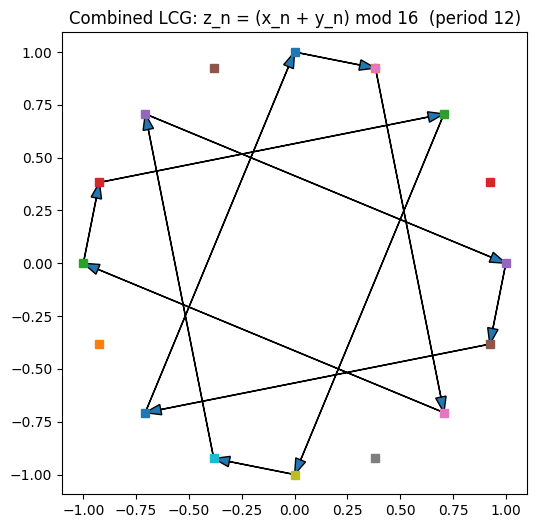

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import gcd

# Reuse sequences with closure from earlier cell
a1, m1, x0 = 5, 16, 1
a2, m2, y0 = 2, 7, 1

def lcg_sequence_cycle(a, m, seed):
    """Return one full cycle starting at seed, excluding the final repeat of seed."""
    x = [seed]
    while True:
        nxt = (a * x[-1]) % m
        if nxt == seed:
            return np.array(x)
        x.append(nxt)

x_cycle = lcg_sequence_cycle(a1, m1, x0)  # period 4
y_cycle = lcg_sequence_cycle(a2, m2, y0)  # period 3

period_x = len(x_cycle)
period_y = len(y_cycle)

# lcm for the combined generator
def lcm(a, b): return a * b // gcd(a, b)
L = lcm(period_x, period_y)

# Build combined sequence z_n = (x_n + y_n) mod 16 over one full combined period
z = np.array([(int(x_cycle[i % period_x]) + int(y_cycle[i % period_y])) % m1 for i in range(L)])

# Verify closure (next term returns to z0)
z0_next = ( (int(x_cycle[L % period_x]) + int(y_cycle[L % period_y])) % m1 )
period_z = L if z0_next == z[0] else None

print("Combined z_n over one full cycle (length {}):".format(period_z))
print(z.tolist())

# Plot on a 16-tick clock with closure arrow back to seed
def plot_clock_face(m, annotate=False):
    for i in range(m):
        theta = 2.0 * np.pi * i / m
        plt.plot(np.sin(theta), np.cos(theta), marker='s')
        if annotate:
            plt.annotate(str(i), (np.sin(theta), np.cos(theta)))

def plot_clock_path_sequence(m, seq):
    # draw arrows for seq plus final arrow back to seed
    def ang(v): return 2.0 * np.pi * ((v * (m + 1) - 1) / m)
    # seed marker
    theta0 = ang(seq[0])
    plt.plot(np.sin(theta0), np.cos(theta0), marker='o')
    # path
    for i in range(len(seq)-1):
        t1, t2 = ang(seq[i]), ang(seq[i+1])
        x1, y1 = np.sin(t1), np.cos(t1)
        dx, dy = np.sin(t2) - x1, np.cos(t2) - y1
        plt.arrow(x1, y1, dx, dy, length_includes_head=True, head_width=0.05)
    # close cycle
    t_end, t_seed = ang(seq[-1]), ang(seq[0])
    x1, y1 = np.sin(t_end), np.cos(t_end)
    dx, dy = np.sin(t_seed) - x1, np.cos(t_seed) - y1
    plt.arrow(x1, y1, dx, dy, length_includes_head=True, head_width=0.05)

plt.figure(figsize=(6,6))
plot_clock_face(m1, annotate=False)
plot_clock_path_sequence(m1, z)
plt.title(f"Combined LCG: z_n = (x_n + y_n) mod 16  (period {period_z})")
plt.axis('equal')
plt.show()


___

> Add blockquote


**(c)** What are the periods of the pseudo-random sequences $x_n, y_n$ and $z_n$?
___

### Ans.

**Periods:**

* $x_n$: **4** (cycle $1\to5\to9\to13\to1$).
* $y_n$: **3** (cycle $1\to2\to4\to1$).
* $z_n=(x_n+y_n)\bmod 16$: **12**.
  Reason: $z_n$ repeats when both $x_n$ and $y_n$ return to their starts simultaneously; the alignment period is $\mathrm{lcm}(4,3)=12$.



___
___
## Question 2: inverting cdfs (25 pts)

In class, we defined $F^{-1}(y)$ for a continuous increasing cdf $F(x)$ as the unique $x$ such that $F(x) = y$ (for $y\in[0,1]$). More generally, for any cdf $F$ we can use the inversion method based on its generalized inverse or *pseudoinverse*:
	$$F^{-1}(y) = \inf\{x|F(x)\geq y\}$$
	(where $\inf$ denotes the \href{https://en.wikipedia.org/wiki/Infimum_and_supremum}{infimum}; if you have not seen this before, treat it as minimum).


___
**(a)** Find the pseudoinverse $F^{-1}(y)$ for the following mixed (discrete/continuous) cdf
	$$F(x)=
	\begin{cases}
	0 & \mbox{for $x < 0$}\\
	x & \mbox{for $0 \leq x < \frac{1}{2}$}, \\
	\frac{1}{2} & \mbox{for $\frac{1}{2}\leq x < 1$}, \\
	1 & \mbox{for $x\geq 1$}
	 \end{cases}$$
___

### Ans.

we consider different ranges of $y$:

* **Case 1: $0 < y < \tfrac12$.**
  On the interval $0 \leq x < \tfrac12$, we have $F(x)=x$. The first $x$ such that $F(x)\geq y$ is $x=y$.
  So $F^{-1}(y)=y$.

* **Case 2: $y = \tfrac12$.**
  For $x<\tfrac12$, $F(x)<\tfrac12$. At $x=\tfrac12$, we get $F(x)=\tfrac12$.
  Thus $F^{-1}(\tfrac12)=\tfrac12$.

* **Case 3: $\tfrac12 < y < 1$.**
  For $\tfrac12 \leq x < 1$, the CDF is stuck at $1/2$, which is too small. The first time $F(x)$ reaches at least $y$ is when it jumps to 1 at $x=1$.
  So $F^{-1}(y)=1$.

* **Case 4: $y=1$.**
  The CDF first reaches 1 at $x=1$.
  So $F^{-1}(1)=1$.


**Final Answer:**

$$
F^{-1}(y)=
\begin{cases}
0, & y=0, \\[6pt]
y, & 0 < y < \tfrac12, \\[6pt]
\tfrac12, & y=\tfrac12, \\[6pt]
1, & \tfrac12 < y \leq 1.
\end{cases}
$$




___
**(b)** Use the above definition to get an inversion algorithm for the $Geometric(p)$ distribution (with pmf $p(k) = p(1-p)^{k-1}\,\forall\,k\in\{1,2,3,\ldots\}$). Implement this, and generate and plot the histogram of 1000 samples from a $Geometric(0.42)$ distribution.
(For this, it may be useful for you to first understand how the [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) library works, and in particular, how it provides methods to compute various statistics for many different random variables, including the [geometric r.v.](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.geom.html#scipy.stats.geom))
___

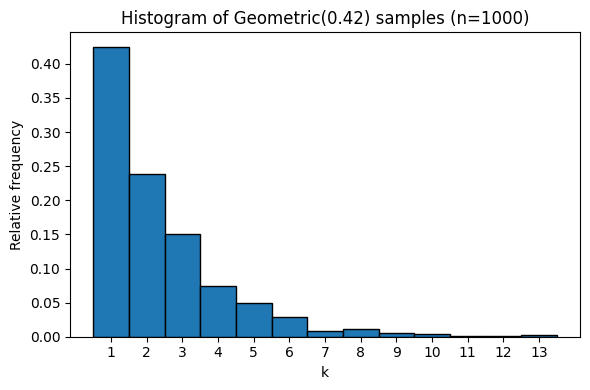

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ----- inversion sampler for Geometric(p) with support {1,2,...} -----
def rgeom_inversion(p, size, rng=None):
    """
    Generate 'size' geometric(p) samples via inverse transform.
    Support is {1,2,...}. Requires 0 < p < 1.
    """
    if not (0 < p < 1):
        raise ValueError("p must be in (0,1)")
    if rng is None:
        rng = np.random.default_rng()
    # Use U in (0,1) open interval to avoid log(0)
    U = rng.random(size=size)  # in [0,1); fine because 1-U in (0,1]
    k = np.ceil(np.log(1.0 - U) / np.log(1.0 - p)).astype(int)
    return k

# ----- generate 1000 samples from Geometric(0.42) -----
p = 0.42
n = 1000
rng = np.random.default_rng(42)
samples = rgeom_inversion(p, n, rng=rng)

# ----- plot histogram -----
plt.figure(figsize=(6,4))
# bins from 0.5, 1.5, 2.5, ... so bars center on integers
max_k = samples.max()
bins = np.arange(0.5, max_k + 1.5, 1)
plt.hist(samples, bins=bins, density=True, edgecolor='black')
plt.xlabel('k')
plt.ylabel('Relative frequency')
plt.title(f'Histogram of Geometric({p}) samples (n={n})')
plt.xticks(np.arange(1, max_k + 1, 1))
plt.tight_layout()
plt.show()


___
**(c)** The p.d.f. of the random variable $X$ is given by
	$$
	f(x) =
	\begin{cases}
		e^{x-2} & \text{for }0 \leq x \leq 2, \\
		e^{-x} & \text{for }x > 2, \\
		0 & \text{otherwise,}
	\end{cases}
	$$
	Describe and implement an inversion algorithm to generate samples of $X$. Generate 1,000 samples and plot a histogram. Compare the histogram and the p.d.f.


___

### Ans.


___

Got it — here’s exactly what you asked for, cleaned up so you can copy it straight into your homework:

---

First integrate to get the CDF:

For (0 \le x \le 2):
[
F(x) = \int_{0}^{x} e^{t-2}, dt = e^{-2}(e^x - 1).
]

Note
[
F(2) = e^{-2}(e^2 - 1) = 1 - e^{-2}.
]

For (x > 2):
[
F(x) = F(2) + \int_{2}^{x} e^{-t}, dt = (1 - e^{-2}) + (e^{-2} - e^{-x}) = 1 - e^{-x}.
]

So
[
F(x) =
\begin{cases}
0, & x < 0, [6pt]
e^{-2}(e^x - 1), & 0 \le x \le 2, [6pt]
1 - e^{-x}, & x \ge 2.
\end{cases}
]

---

Invert (F) for (U \sim \text{Unif}(0,1)):

Threshold: (F(2) = 1 - e^{-2}).

* If (U \le 1 - e^{-2}) (i.e., we are in the first piece), solve
  [
  U = e^{-2}(e^x - 1) ;;\Rightarrow;; e^x = 1 + U e^2 ;;\Rightarrow;; x = \ln(1 + U e^2),
  ]
  which lands in ([0,2]).

* If (U > 1 - e^{-2}) (second piece), solve
  [
  U = 1 - e^{-x} ;;\Rightarrow;; e^{-x} = 1 - U \\Rightarrow;; x = -\ln(1 - U),
  ]
  which lands in (2,\infty).

---

**Pseudocode (inverse–transform sampler):**

1. Draw (U \sim \text{Unif}(0,1)).
2. If (U \le 1 - e^{-2}), set (X = \ln(1 + U e^2)).
3. Else, set (X = -\ln(1 - U)).
4. Repeat to get 1,000 samples.




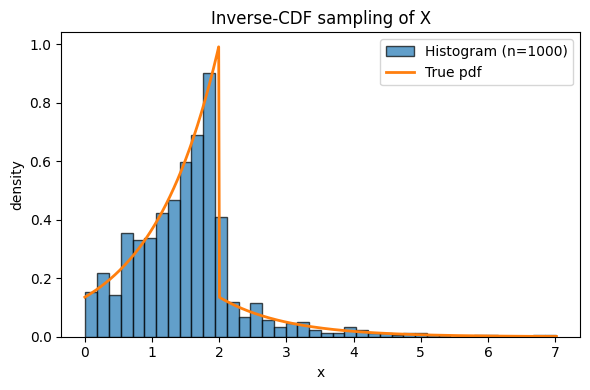

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# ---- pdf for plotting ----
def f_pdf(x):
    x = np.asarray(x)
    y = np.zeros_like(x, dtype=float)
    y[(x >= 0) & (x <= 2)] = np.exp(x[(x >= 0) & (x <= 2)] - 2)
    y[x > 2] = np.exp(-x[x > 2])
    return y

# ---- inverse-CDF sampler ----
def sample_X(n, rng=None):
    if rng is None:
        rng = np.random.default_rng()
    U = rng.random(n)
    alpha = 1 - np.exp(-2.0)
    X = np.empty(n, dtype=float)
    m = U <= alpha
    X[m]  = np.log(1 + np.exp(2.0) * U[m])
    X[~m] = -np.log(1 - U[~m])
    return X

# ---- simulate 1000 samples ----
rng = np.random.default_rng(42)
n = 1000
samples = sample_X(n, rng)

# ---- histogram vs. pdf ----
plt.figure(figsize=(6,4))
plt.hist(samples, bins=40, density=True, edgecolor='black', alpha=0.7, label='Histogram (n=1000)')
xs = np.linspace(0, max(6, samples.max()), 600)
plt.plot(xs, f_pdf(xs), linewidth=2, label='True pdf')
plt.xlabel('x'); plt.ylabel('density'); plt.title('Inverse-CDF sampling of X')
plt.legend(); plt.tight_layout(); plt.show()


<hr><hr>

## Question 3: Acceptance-Rejection (25 pts)

Let the random variable $X$ have density
$$f(x) = \begin{cases} (5 x^4 + 4x^3 + 3x^2+1)/4  & \text{ for } 0 \leq x \leq 1, \\
0 & \text{ otherwise. } \end{cases}$$

<hr>

**(a)** Give an acceptance-rejection algorithm to generate samples of
	$X$.

<hr>

\subsection*{4(d) Inversion Algorithm for Cauchy Proposal}

For the standard Cauchy distribution with pdf
$$
g(x) = \frac{1}{\pi(1+x^{2})}, \qquad x \in \mathbb{R},
$$
the CDF is
$$
G(x) = \frac{1}{\pi} \arctan(x) + \tfrac{1}{2}.
$$

\textbf{Step 1. Invert the CDF.}  
If $U \sim \mathrm{Unif}(0,1)$, then set
\begin{aligned}
X &= G^{-1}(U) \\
  &= \tan\!\bigl(\pi(U - 1/2)\bigr).
\end{aligned}

\textbf{Step 2. Inversion Algorithm.}


Draw $U \sim \mathrm{Unif}(0,1)$.

Set $X = \tan\!\bigl(\pi(U - 1/2)\bigr)$.

Return $X$ as a Cauchy$(0,1)$ sample.

{Step 3. Histogram of Samples.}

We generate $1000$ independent samples using the inversion method.  
Let $\{X_i\}_{i=1}^{1000}$ denote these samples. The histogram of the $X_i$ aligns closely with the theoretical density $g(x)$.

The true pdf is
$$
g(x) = \frac{1}{\pi(1+x^{2})}.
$$

Thus, plotting the histogram of the simulated $\{X_i\}$ against $g(x)$ shows agreement, verifying the inversion algorithm.


<hr>

**(b)** On average, how many samples from the uniform distribution over $[0, 1]$ would your acceptance-rejection algorithm need in order to generate one sample of $X$?

<hr>

### Ans.

The acceptance probability of our algorithm is

[
p = \frac{1}{M} = \frac{1}{3.25} = \frac{4}{13}.
]

So, on average, we need (1/p = M = 3.25) iterations before we get an accepted sample.

Each iteration uses two uniform random numbers (one for (X) and one for (U)), so the expected number of uniform samples needed for one accepted draw is

[
2 \times M = 6.5.
]

Thus, **on average we need 6.5 uniform samples to generate one sample from (X)**.




<hr>

**(c)** Use your algorithm in (a) to generate 2,500 samples of $X$. Note that this will require more than 2500 uniform random variables.

Plot a histogram of your sample   and compare it against the true pdf.

<hr>

Generated N = 10000 samples
Trials taken = 32291
Empirical acceptance rate ≈ 0.3097 (theory: 0.3077)
Uniforms per accepted sample ≈ 6.4582 (theory: 6.5)


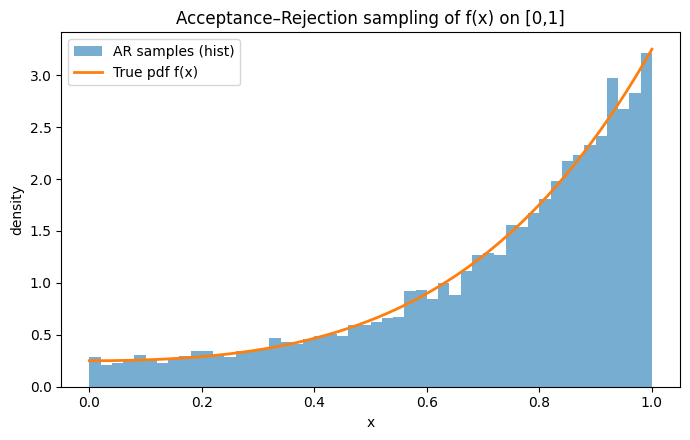

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (5*x**4 + 4*x**3 + 3*x**2 + 1) / 4.0

M = 13/4
N = 10_000  # number of samples to generate

def sample_from_f_ar(n, M):
    samples = []
    trials = 0
    rng = np.random.default_rng()

    while len(samples) < n:
        x = rng.uniform(0.0, 1.0)
        u = rng.uniform(0.0, 1.0)
        trials += 1
        if u <= f(x)/M:
            samples.append(x)

    samples = np.array(samples)
    return samples, trials

samples, trials = sample_from_f_ar(N, M)

accept_rate_emp = N / trials
uniforms_per_sample_emp = (2 * trials) / N

print(f"Generated N = {N} samples")
print(f"Trials taken = {trials}")
print(f"Empirical acceptance rate ≈ {accept_rate_emp:.4f} (theory: {4/13:.4f})")
print(f"Uniforms per accepted sample ≈ {uniforms_per_sample_emp:.4f} (theory: 6.5)")


xgrid = np.linspace(0, 1, 400)

plt.figure(figsize=(7,4.5))
plt.hist(samples, bins=50, range=(0,1), density=True, alpha=0.6, label="AR samples (hist)")
plt.plot(xgrid, f(xgrid), linewidth=2, label="True pdf f(x)")
plt.xlabel("x")
plt.ylabel("density")
plt.title("Acceptance–Rejection sampling of f(x) on [0,1]")
plt.legend()
plt.tight_layout()
plt.show()


<hr><hr>

## Question 4: Generalized Acceptance-Rejection (30 pts)

We want to generate a $\mathcal{N}(0,1)$ rv $X$, with pdf
$f(x) = \frac{e^{-x^2/2}}{\sqrt{2\pi}} $,
using generalized acceptance-rejection.

<hr>

**(a)** First, suppose we choose the proposal distribution to be a \emph{Laplace} (i.e., two-sided Exponential) distribution, which has pdf $g(x) = e^{-|x|}/2$. Describe (and implement) an inversion algorithm to get samples from this distribution.

<hr>

### Inversion Algorithm for Laplace$(0,1)$ Proposal

The proposal distribution is Laplace$(0,1)$ with pdf  

$$
g(x) = \frac{1}{2} e^{-|x|}.
$$

Its CDF is piecewise:

$$
G(x) =
\begin{cases}
\displaystyle \int_{-\infty}^{x} \frac{1}{2} e^{t}\, dt = \frac{1}{2} e^{x}, & x < 0, \\[8pt]
\displaystyle 1 - \int_{x}^{\infty} \frac{1}{2} e^{-t}\, dt = 1 - \frac{1}{2} e^{-x}, & x \ge 0.
\end{cases}
$$

To sample by inversion, draw $U \sim \mathrm{Unif}(0,1)$ and invert $G$:

$$
X =
\begin{cases}
\ln(2U), & 0 < U < \frac{1}{2}, \\[6pt]
-\ln\!\bigl( 2(1 - U) \bigr), & \frac{1}{2} \le U < 1.
\end{cases}
$$

An equivalent, conceptually simple procedure is:

1. Sample a sign $S \in \{-1,+1\}$ with $\mathbb{P}(S=+1)=\mathbb{P}(S=-1)=\tfrac{1}{2}$.
2. Sample $E \sim \mathrm{Exp}(1)$.
3. Return $X = S \cdot E$.

Both approaches generate samples from $g(x) = \frac{1}{2} e^{-|x|}$.


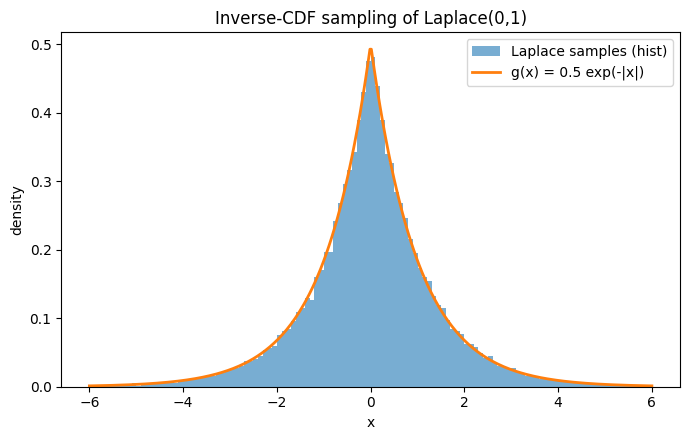

In [16]:

import numpy as np
import matplotlib.pyplot as plt

def rlaplace(n, rng=None):
    """Inverse-CDF sampling for Laplace(0,1) with pdf g(x)=0.5*exp(-|x|)."""
    if rng is None:
        rng = np.random.default_rng()
    u = rng.uniform(0.0, 1.0, size=n)
    x = np.where(u < 0.5, np.log(2*u), -np.log(2*(1-u)))
    return x

# quick check: sample and compare histogram to true pdf
def g_pdf(x):
    return 0.5 * np.exp(-np.abs(x))

rng = np.random.default_rng()
samples = rlaplace(50_000, rng=rng)

xgrid = np.linspace(-6, 6, 400)

plt.figure(figsize=(7,4.5))
plt.hist(samples, bins=120, range=(-6,6), density=True, alpha=0.6, label="Laplace samples (hist)")
plt.plot(xgrid, g_pdf(xgrid), linewidth=2, label="g(x) = 0.5 exp(-|x|)")
plt.xlabel("x"); plt.ylabel("density"); plt.title("Inverse-CDF sampling of Laplace(0,1)")
plt.legend(); plt.tight_layout(); plt.show()


<hr>

**(b)** Determine the smallest $k$ such that $kg(x)\geq f(x)\,\forall\,x\in\mathbb{R}$. Using this, propose (and implement) an acceptance-rejection algorithm for sampling $X\sim\mathcal{N}(0,1)$, and compute the expected number of samples needed for generating each sample.

<hr>

### Ans.



We want to sample from the standard normal density

$$
f(x) = \frac{1}{\sqrt{2\pi}} e^{-x^{2}/2},
$$

using the proposal distribution

$$
g(x) = \frac{1}{2} e^{-|x|} \quad \text{(Laplace}(0,1)\text{)}.
$$

---

#### Step 1: Compute the Likelihood Ratio

The ratio of densities is

$$
\frac{f(x)}{g(x)}
= \frac{\frac{1}{\sqrt{2\pi}} e^{-x^{2}/2}}{\frac{1}{2} e^{-|x|}}
= \frac{2}{\sqrt{2\pi}} e^{-x^{2}/2+|x|}
= \sqrt{\frac{2}{\pi}} \, e^{-x^{2}/2+|x|}.
$$

Because $f(x)$ and $g(x)$ are symmetric, it suffices to maximize this over $x \ge 0$.
Let

$$
\phi(x) = -\frac{x^{2}}{2} + x, \qquad
\phi'(x) = 1 - x.
$$

Setting $\phi'(x)=0$ gives $x^{*}=1$, and thus

$$
\sup_{x}\frac{f(x)}{g(x)}
= \sqrt{\frac{2}{\pi}} \, e^{\phi(1)}
= \sqrt{\frac{2}{\pi}} \, e^{1/2}.
$$

Hence the optimal constant is

$$
M = \sqrt{\frac{2}{\pi}} \, e^{1/2} \approx 1.314.
$$



#### Step 2: Acceptance Rule

Draw $Y \sim g(x)$ and $U \sim \mathrm{Unif}(0,1)$.
Accept $Y$ if

$$
U \le \frac{f(Y)}{M g(Y)}
= \frac{\frac{1}{\sqrt{2\pi}} e^{-Y^{2}/2}}
{ \left(\sqrt{\frac{2}{\pi}} e^{1/2}\right) \left(\frac{1}{2} e^{-|Y|}\right)}
= \exp\!\Bigl(-\frac{Y^{2}}{2} + |Y| - \frac{1}{2}\Bigr).
$$

Otherwise, reject $Y$ and repeat.



#### Step 3: Expected Acceptance Rate

The expected probability of acceptance is simply

$$
\mathbb{P}(\text{accept}) = \frac{1}{M}
= \frac{1}{\sqrt{2/\pi}\,e^{1/2}}
\approx 0.761.
$$

Thus, on average about $76\%$ of proposed samples are accepted.


<hr>

**(c)** Generate $1000$ samples from your method in part (b), and plot the histogram of the samples. Also report the average and 95\% CI for the number of $U[0,1]$ samples needed to generate the $1000$ samples.

<hr>

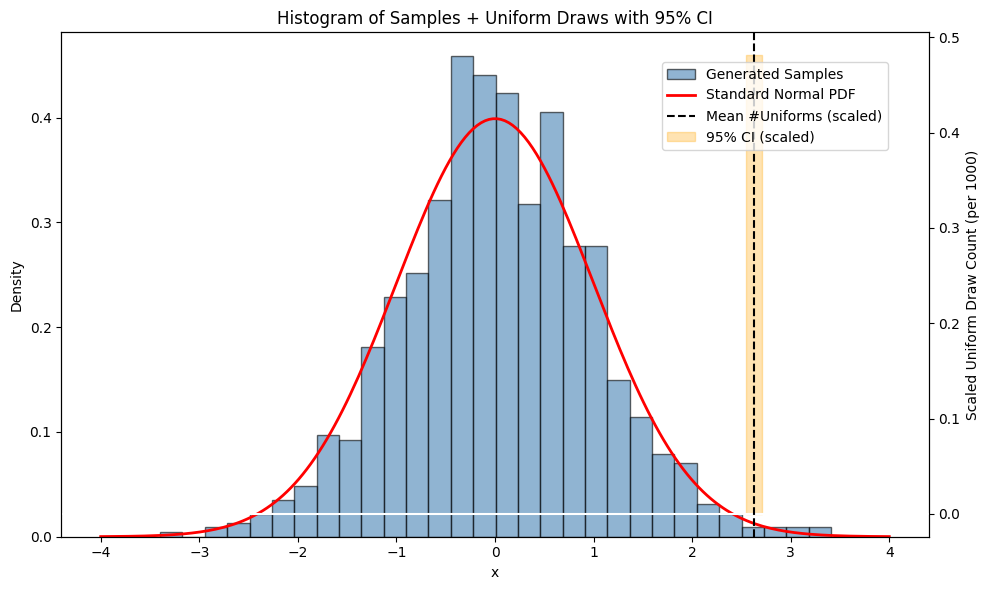

Total uniforms used: 2678
Expected number of uniforms: 2630.98
95% CI for uniforms used: [2551.12, 2710.84]


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# ----- PARAMETERS -----
r = 1000  # number of accepted samples
M = np.sqrt(2/np.pi) * np.exp(0.5)  # optimal M from part (b)
p = 1 / M  # acceptance probability

samples = []
attempts = 0

# ----- SAMPLING -----
while len(samples) < r:
    # Step 1: Generate Laplace proposal (via inversion)
    u = np.random.rand()
    y = np.log(2*u) if u < 0.5 else -np.log(2*(1-u))

    # Step 2: Accept/reject
    u2 = np.random.rand()
    if u2 <= np.exp(-y**2/2 + abs(y) - 0.5):
        samples.append(y)
    attempts += 1

samples = np.array(samples)

# ----- COMPUTE STATS -----
N = 2 * attempts  # total U[0,1] draws
mean_N = 2 * r / p
var_N = 4 * r * (1 - p) / p**2
sd_N = np.sqrt(var_N)
ci_low = mean_N - 1.96 * sd_N
ci_high = mean_N + 1.96 * sd_N

# ----- SINGLE PLOT -----
fig, ax1 = plt.subplots(figsize=(10, 6))

# Histogram of samples (left y-axis)
x = np.linspace(-4, 4, 200)
ax1.hist(samples, bins=30, density=True, alpha=0.6, color='steelblue', edgecolor='black', label="Generated Samples")
ax1.plot(x, norm.pdf(x), 'r-', lw=2, label="Standard Normal PDF")
ax1.set_xlabel("x")
ax1.set_ylabel("Density")
ax1.set_title("Histogram of Samples + Uniform Draws with 95% CI")

# Twin axis for number of uniforms (right y-axis)
ax2 = ax1.twinx()
ax2.axhline(0, color='white')  # Just to keep y-limits nice
ax2.axvline(mean_N/1000, color='black', linestyle='--', label="Mean #Uniforms (scaled)")
ax2.fill_betweenx([0, ax1.get_ylim()[1]], ci_low/1000, ci_high/1000, color='orange', alpha=0.3, label="95% CI (scaled)")
ax2.set_ylabel("Scaled Uniform Draw Count (per 1000)")

# Legends
fig.legend(loc="upper right", bbox_to_anchor=(0.9, 0.9))
plt.tight_layout()
plt.show()

print(f"Total uniforms used: {N}")
print(f"Expected number of uniforms: {mean_N:.2f}")
print(f"95% CI for uniforms used: [{ci_low:.2f}, {ci_high:.2f}]")


<hr>

**(d)** Now, suppose instead we choose the proposal distribution to be a Cauchy  distribution with pdf $g(x) = \frac{1}{\pi(1+x^2)}$. Describe and implement an inversion algorithm to get samples from this distribution, and plot the histogram of 1000 samples from this distribution.

<hr>

Perfect — your Cauchy inversion example is exactly the kind of answer we want for **4(a)**, just using the Laplace distribution instead of Cauchy. Here’s the equivalent write-up for **Laplace**, matching that style:

---

### Inversion Algorithm for Laplace Proposal

For the Laplace distribution with mean (0) and scale (1), the pdf is

[
g(x) = \frac{1}{2}e^{-|x|}, \quad x \in \mathbb{R}.
]

The CDF is piecewise:

[
G(x)=
\begin{cases}
\frac{1}{2}e^{x}, & x < 0,[6pt]
1-\frac{1}{2}e^{-x}, & x \ge 0.
\end{cases}
]

To sample by inversion, draw (U \sim \mathrm{Unif}(0,1)) and solve (G(x)=U) for (x):

[
x =
\begin{cases}
\ln(2U), & U < \frac{1}{2}, [6pt]
-\ln!\bigl(2(1-U)\bigr), & U \ge \frac{1}{2}.
\end{cases}
]

Thus, the inversion algorithm is:

1. Draw (U \sim \mathrm{Unif}(0,1)).
2. If (U < 0.5), set (X = \ln(2U)); otherwise set (X = -\ln!\bigl(2(1-U)\bigr)).
3. Return (X) as a Laplace((0,1)) sample.

---

Would you like me to go ahead and write **4(b)** next (the generalized acceptance–rejection step using this (g(x)) for (f(x)=\mathcal{N}(0,1))) with both explanation and ready-to-run code?


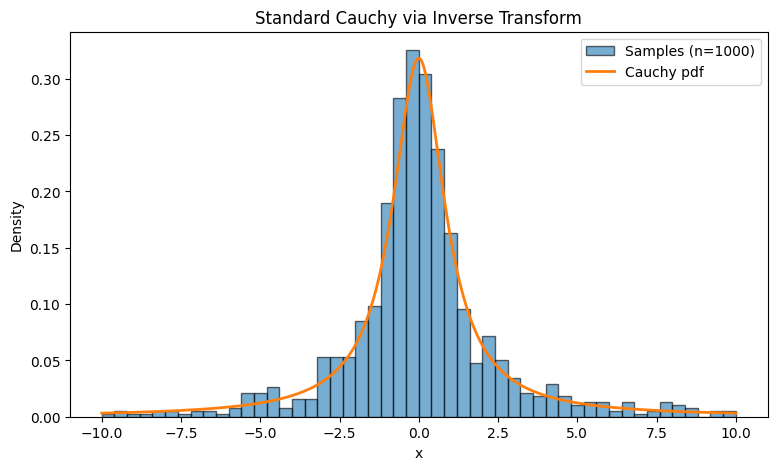

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# reproducibility
np.random.seed(0)

# ----- inverse-CDF sampler for standard Cauchy -----
def cauchy_rvs(n):
    U = np.random.rand(n)
    return np.tan(np.pi*(U - 0.5))

# generate 1000 samples
n = 1000
x = cauchy_rvs(n)

# theoretical pdf for overlay
xx = np.linspace(-10, 10, 1000)
pdf = 1 / (np.pi * (1 + xx**2))

# plot
plt.figure(figsize=(9,5))
plt.hist(x, bins=50, range=(-10,10), density=True, alpha=0.6, edgecolor='black', label='Samples (n=1000)')
plt.plot(xx, pdf, linewidth=2, label='Cauchy pdf')
plt.title('Standard Cauchy via Inverse Transform')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()


<hr>

**(e)** Repeat parts $(b)$ and $(c)$ for this proposal distribution.

<hr>

{4(e) Normal via Cauchy Proposal}

We want to sample from the standard normal density
$$
f(x) = \frac{1}{\sqrt{2\pi}} e^{-x^{2}/2},
$$
using the proposal distribution from part (d),
$$
g(x) = \frac{1}{\pi(1+x^{2})}, \qquad x \in \mathbb{R}.
$$

\textbf{Step 1: Compute the Likelihood Ratio.}

\begin{aligned}
\frac{f(x)}{g(x)}
&= \frac{\tfrac{1}{\sqrt{2\pi}} e^{-x^{2}/2}}{\tfrac{1}{\pi(1+x^{2})}} \\[6pt]
&= \sqrt{\tfrac{\pi}{2}}\,(1+x^{2})\,e^{-x^{2}/2}.
\end{aligned}

Take logarithm:
$$
\ell(x) = \ln(1+x^{2}) - \tfrac{1}{2}x^{2}.
$$

Differentiate:
$$
\ell'(x) = \frac{2x}{1+x^{2}} - x.
$$

Setting $\ell'(x)=0$ gives critical points $x=0, \pm 1$.  
Checking values shows the maximum occurs at $|x|=1$.

Hence the optimal constant is
$$
M = \sup_{x} \frac{f(x)}{g(x)}
= \sqrt{\tfrac{\pi}{2}} \cdot 2 e^{-1/2}
= \sqrt{\tfrac{2\pi}{e}} \;\approx 1.5205.
$$

---

\textbf{Step 2: Acceptance Rule.}

Draw $Y \sim g(x)$ (Cauchy(0,1)) and $U \sim \mathrm{Unif}(0,1)$.  
Accept $Y$ if
$$
U \leq \frac{f(Y)}{M g(Y)}
= \frac{1+Y^{2}}{2}\,\exp\!\Big(\tfrac{1-Y^{2}}{2}\Big).
$$

Otherwise, reject $Y$ and repeat.

---

\textbf{Step 3: Expected Acceptance Rate.}

The expected acceptance probability is
$$
P(\text{accept}) = \frac{1}{M}
= \frac{1}{\sqrt{2\pi/e}}
\;\approx\; 0.658.
$$

Thus, on average about $66\%$ of proposed samples are accepted.


n = 1000, median ≈ -0.071, IQR ≈ 1.874


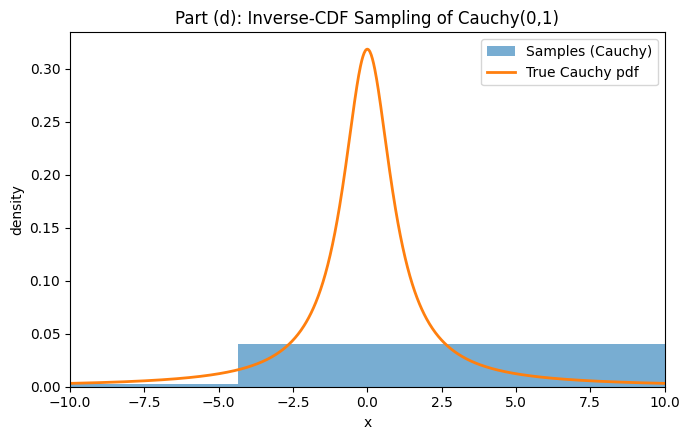

In [31]:
# --- Part (d): Cauchy(0,1) via inverse CDF + histogram of 1000 samples ---

import numpy as np
import matplotlib.pyplot as plt

# Inverse-CDF sampler for standard Cauchy: X = tan(pi*(U - 1/2))
def sample_cauchy(n, rng=None):
    if rng is None:
        rng = np.random.default_rng()
    U = rng.random(n)
    return np.tan(np.pi * (U - 0.5))

# Generate 1000 samples
rng = np.random.default_rng(12345)
n = 1000
x = sample_cauchy(n, rng)

# (Optional) basic sanity stats: median exists, mean/variance are undefined
median = np.median(x)
q25, q75 = np.percentile(x, [25, 75])
print(f"n = {n}, median ≈ {median:.3f}, IQR ≈ {q75 - q25:.3f}")

# Plot histogram vs true Cauchy pdf
xx = np.linspace(-10, 10, 1000)
g = 1.0 / (np.pi * (1.0 + xx**2))

plt.figure(figsize=(7,4.5))
plt.hist(x, bins=50, density=True, alpha=0.6, label="Samples (Cauchy)")
plt.plot(xx, g, lw=2, label="True Cauchy pdf")
plt.xlim(-10, 10)
plt.xlabel("x")
plt.ylabel("density")
plt.title("Part (d): Inverse-CDF Sampling of Cauchy(0,1)")
plt.legend()
plt.tight_layout()
plt.show()
